In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_20201101 = pd.read_csv(r'C:\Users\Kun\Downloads\data_v3\df_20201101.csv')
df_20201101.head()

Unnamed: 0                timestamp  engineActualPercentTorque  \
0           0  2020-09-17 18:40:11.100                  38.375000   
1           1  2020-09-17 18:40:11.400                  38.938889   
2           2  2020-09-17 18:40:11.700                  39.502778   
3           3  2020-09-17 18:40:12.000                  40.066667   
4           4  2020-09-17 18:40:12.300                  38.377778   

   engineSpeed  engineFuelRate  accelPedalPos  engineTripFuel  \
0  1067.750000       18.266667      33.600000        119829.5   
1  1070.319444       18.627778      34.000000        119829.5   
2  1072.888889       18.988889      34.400000        119829.5   
3  1075.458333       19.350000      34.800000        119829.5   
4  1071.352778       18.505556      34.222222        119829.5   

   engineTotalFuelUsed   latitude  longitude  ...              leg  legId  \
0             119829.5  57.710807   11.65881  ...  Öckerö-Kalvsund      1   
1             119829.5  57.710807   11.65881  ...  Öckerö-Kalvsund      1   
2             119829.5  57.710807   11.65881  ...  Öckerö-Kalvsund      1   
3             119829.5  57.710807   11.65881  ...  Öckerö-Kalvsund      1   
4             119829.5  57.710807   11.65881  ...  Öckerö-Kalvsund      1   

                                legUUID  distanceToNextDock  \
0  e0ecbd21-c4ad-41ce-a5a1-3f2e1f394b88         1451.847844   
1  e0ecbd21-c4ad-41ce-a5a1-3f2e1f394b88         1451.846671   
2  e0ecbd21-c4ad-41ce-a5a1-3f2e1f394b88         1451.847844   
3  e0ecbd21-c4ad-41ce-a5a1-3f2e1f394b88         1451.850582   
4  e0ecbd21-c4ad-41ce-a5a1-3f2e1f394b88         1451.853934   

   distanceToPreviousDock  segmentId                           segmentUUID  \
0               11.194931          2  6c51dc47-efe2-47ef-b3a5-feda0a1cec8c   
1               11.196104          2  6c51dc47-efe2-47ef-b3a5-feda0a1cec8c   
2               11.194931          2  6c51dc47-efe2-47ef-b3a5-feda0a1cec8c   
3               11.192193          2  6c51dc47-efe2-47ef-b3a5-feda0a1cec8c   
4               11.188841          2  6c51dc47-efe2-47ef-b3a5-feda0a1cec8c   

   accumDistLeg  accumFuelLeg  accumTimeLeg  
0      0.008531      0.001522           0.3  
1      0.016837      0.003075           0.6  
2      0.024736      0.004657           0.9  
3      0.032093      0.006269           1.2  
4      0.038815      0.007812           1.5  

[5 rows x 43 columns]

In [3]:
df_20201101 = df_20201101[df_20201101.engineActualPercentTorque > 0] 

In [4]:
df_20201101['timestamp'] = pd.to_datetime(df_20201101['timestamp'])

In [5]:
df_20201101.columns

Index(['Unnamed: 0', 'timestamp', 'engineActualPercentTorque', 'engineSpeed',
       'engineFuelRate', 'accelPedalPos', 'engineTripFuel',
       'engineTotalFuelUsed', 'latitude', 'longitude', 'satellites',
       'rateOfTurn', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'magneticVariation', 'pitch', 'roll', 'temperature',
       'pressure', 'windSpeedOverGround', 'windDirectionTrue',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTotal',
       'deltaDistance', 'acceleration', 'courseHeadingDiff', 'engineOn',
       'distanceFromDock', 'closestDock', 'steadyState', 'segmentState', 'leg',
       'legId', 'legUUID', 'distanceToNextDock', 'distanceToPreviousDock',
       'segmentId', 'segmentUUID', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg'],
      dtype='object')

In [6]:
df_20201101['FuelConsumption'] = df_20201101['engineFuelRate']*0.3/3600
df_20201101['FuelConsumption']

0           0.001522
1           0.001552
2           0.001582
3           0.001613
4           0.001542
              ...   
10810531    0.000099
10810532    0.000098
10810533    0.000097
10810534    0.000065
10810535    0.000032
Name: FuelConsumption, Length: 10796918, dtype: float64

In [7]:
df_20201101 = df_20201101[["timestamp", "engineTotalFuelUsed", "engineActualPercentTorque",'engineSpeed', 'speedOverGround', 'engineFuelRate', 'FuelConsumption']]

In [8]:
df_20201101[["timestamp", "engineActualPercentTorque",'engineSpeed', 'speedOverGround', 'engineFuelRate', 'FuelConsumption']].describe()

engineActualPercentTorque   engineSpeed  speedOverGround  \
count               1.079692e+07  1.079692e+07     1.079692e+07   
mean                3.098200e+01  1.059302e+03     2.138532e+00   
std                 1.680730e+01  2.962545e+02     1.777252e+00   
min                 1.666667e-02  3.679040e+02     0.000000e+00   
25%                 1.750000e+01  8.100877e+02     0.000000e+00   
50%                 2.935000e+01  1.050254e+03     2.123333e+00   
75%                 4.106667e+01  1.256250e+03     3.850000e+00   
max                 9.840000e+01  2.252875e+03     1.013000e+01   

       engineFuelRate  FuelConsumption  
count    1.079692e+07     1.079692e+07  
mean     1.648135e+01     1.373446e-03  
std      1.241670e+01     1.034725e-03  
min      0.000000e+00     0.000000e+00  
25%      6.350000e+00     5.291667e-04  
50%      1.370000e+01     1.141667e-03  
75%      2.272778e+01     1.893981e-03  
max      6.981667e+01     5.818056e-03

In [9]:
X, y = df_20201101[["engineSpeed", "engineActualPercentTorque"]], df_20201101[["engineFuelRate"]]
X.shape, y.shape

((10796918, 2), (10796918, 1))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)

print(f"{scaled_X.min():.2f} ≤ scaled_X ≤ {scaled_X.max():.2f}")

0.00 ≤ scaled_X ≤ 1.00


In [11]:
scaler = MinMaxScaler()
scaler.fit(y)

scaled_y = scaler.transform(y)

print(f"{scaled_y.min():.2f} ≤ scaled_y ≤ {scaled_y.max():.2f}")

0.00 ≤ scaled_y ≤ 1.00


## Models

In [12]:
with open('saved_models/SVD.pickle','rb') as f:
    model_SVD = pickle.load(f)
print(model_SVD)

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/SVD_penta.pickle'

In [ ]:
score_SVD = model_SVD.score(scaled_X,scaled_y)

pred_SVD = model_SVD.predict(scaled_X)
mae_SVD = mean_absolute_error(scaled_y, pred_SVD)

print(f"Linear, score: {score_SVD:.7f}, MAE: {mae_SVD:.7f}")

Linear, score: 0.9302737, MAE: 0.0315655


In [ ]:
with open('saved_models/poly_penta.pickle','rb') as f:
    model_poly = pickle.load(f)
print(model_poly)

LinearRegression()


In [ ]:
poly_model_3 = PolynomialFeatures(3, include_bias=False)
X_features = poly_model_3.fit_transform(scaled_X)

score_poly = model_poly.score(X_features,scaled_y)

pred_poly = model_poly.predict(X_features)
mae_poly = mean_absolute_error(scaled_y, pred_poly)

print(f"Poly, score: {score_poly:.7f}, MAE: {mae_poly:.7f}")

Poly, score: 0.9953718, MAE: 0.0083907


In [ ]:
with open('saved_models/knn_penta.pickle','rb') as f:
    model_knn = pickle.load(f)
print(model_knn)

KNeighborsRegressor(n_neighbors=4)


In [ ]:
score_knn = model_knn.score(scaled_X,scaled_y)

pred_knn = model_knn.predict(scaled_X)
mae_knn = mean_absolute_error(scaled_y, pred_knn)

print(f"KNN, score: {score_knn:.7f}, MAE: {mae_knn:.7f}")

KNN, score: 0.9879608, MAE: 0.0147242


In [ ]:
with open('saved_models/tree_regression_penta.pickle','rb') as f:
    model_trees = pickle.load(f)
print(model_trees)

DecisionTreeRegressor(max_depth=7)


In [ ]:
score_trees = model_trees.score(scaled_X,scaled_y)

pred_trees = model_trees.predict(scaled_X)
mae_trees = mean_absolute_error(scaled_y, pred_trees)

print(f"Trees, score: {score_trees:.7f}, MAE: {mae_trees:.7f}")

Trees, score: 0.9764431, MAE: 0.0201379


In [ ]:
with open('saved_models/gbr_penta.pickle','rb') as f:
    model_gbr = pickle.load(f)
print(model_gbr)

GradientBoostingRegressor(max_depth=7)


In [ ]:
score_gbr = model_gbr.score(scaled_X,scaled_y)

pred_gbr = model_gbr.predict(scaled_X)
mae_gbr = mean_absolute_error(scaled_y, pred_gbr)

print(f"GBR, score: {score_gbr:.7f}, MAE: {mae_gbr:.7f}")

GBR, score: 0.9678314, MAE: 0.0241244


In [ ]:
with open('saved_models/xgbr_penta.pickle','rb') as f:
    model_xgbr = pickle.load(f)
print(model_xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [ ]:
score_xgbr = model_xgbr.score(scaled_X,scaled_y)

pred_xgbr = model_xgbr.predict(scaled_X)
mae_xgbr = mean_absolute_error(scaled_y, pred_xgbr)

print(f"XGBR, score: {score_xgbr:.7f}, MAE: {mae_xgbr:.7f}")

XGBR, score: 0.9539429, MAE: 0.0305617


In [ ]:
with open('saved_models/rfr_penta.pickle','rb') as f:
    model_rfr = pickle.load(f)
print(model_rfr)

RandomForestRegressor()


In [ ]:
score_rfr = model_rfr.score(scaled_X,scaled_y)

pred_rfr = model_rfr.predict(scaled_X)
mae_rfr = mean_absolute_error(scaled_y, pred_rfr)

print(f"Random trees, score: {score_rfr:.7f}, MAE: {mae_rfr:.7f}")

Random trees, score: 0.9796099, MAE: 0.0193728


|      Models      |      Scores and errors with X & y scaled (September-November,2020)       |    
|-----------------|-----------------|
|     Linear Regression     |     score: 0.9302737, MAE: 0.0315655   |
|           Polynormial Regression      |       score: 0.9953718, MAE: 0.0083907   ## |
|             KNN    |         score: 0.9879608, MAE: 0.0147242  | 
|             Decision Trees |         score: 0.9764431, MAE: 0.0201379    |
|             Gradient Boosting Decision Tree   |        score: 0.9678314, MAE: 0.0241244     |
|             XGboost   |         score: 0.9539429, MAE: 0.0305617   |  
|             RandomForest   |        score: 0.9796099, MAE: 0.0193728   | 

## Predictions for weeks

In [ ]:
df_20201101['FuelPred_SVD'] = pred_SVD

df_20201101['FuelPred_Poly'] = pred_poly

df_20201101['FuelPred_knn'] = pred_knn

df_20201101['FuelPred_tree'] = pred_trees

df_20201101['FuelPred_gbr'] = pred_gbr

df_20201101['FuelPred_xgbr'] = pred_xgbr

df_20201101['FuelPred_rfr'] = pred_rfr

df_20201101.columns

Index(['timestamp', 'engineTotalFuelUsed', 'engineActualPercentTorque',
       'engineSpeed', 'speedOverGround', 'engineFuelRate', 'FuelConsumption',
       'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn', 'FuelPred_tree',
       'FuelPred_gbr', 'FuelPred_xgbr', 'FuelPred_rfr'],
      dtype='object')

In [ ]:
df_20201101_new = df_20201101.set_index("timestamp")

- find out the real fuel consumptions

In [ ]:
df_20201101_new["2020-09-18":"2020-09-18"].engineTotalFuelUsed.values

array([119878.5, 119878.5, 119878.5, ..., 120146.5, 120146.5, 120146.5])

In [ ]:
fuel_day = 120146.5-119878.5
fuel_day

268.0

In [ ]:
df_20201101_new["2020-09-17":"2020-09-23"].tail(1).engineTotalFuelUsed.values

array([121217.5])

In [ ]:
fuel_week = 121217.5-119829.5
fuel_week

1388.0

In [ ]:
df_20201101_new["2020-09-17":"2020-09-30"].tail(1).engineTotalFuelUsed.values

array([122479.5])

In [ ]:
fuel_2_week = 122479.5-119829.5
fuel_2_week

2650.0

In [ ]:
df_20201101_new["2020-10-08":"2020-10-28"].engineTotalFuelUsed.values

array([124955., 124955., 124955., ..., 129650., 129650., 129650.])

In [ ]:
fuel_3_week = 129650-124955
fuel_3_week

4695

### Create factor by 1 day 

In [ ]:
df_20201101_day = df_20201101.groupby(pd.Grouper(key = 'timestamp', freq = 'd')).sum().reset_index()
df_20201101_day.head(3)

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-09-17         7.006620e+09               1.417695e+06  5.769161e+07   
1 2020-09-18         2.320207e+10               5.875323e+06  2.061327e+08   
2 2020-09-19         2.039978e+10               4.198707e+06  1.669280e+08   

   speedOverGround  engineFuelRate  FuelConsumption  FuelPred_SVD  \
0    120987.348214    6.885979e+05        57.383155   8263.417765   
1    416991.520952    3.187177e+06       265.598043  40561.201377   
2    350266.335952    2.098428e+06       174.869023  24616.935294   

   FuelPred_Poly  FuelPred_knn  FuelPred_tree  FuelPred_gbr  FuelPred_xgbr  \
0    9745.805554   9836.192553    9593.505076   9838.517992    9824.945312   
1   44802.836024  44654.887234   43801.179494  45232.516594   45244.515625   
2   29519.553874  29313.631915   28802.198356  29015.206804   28578.078125   

   FuelPred_rfr  
0   9763.172060  
1  44498.544151  
2  28862.936442

In [61]:
factor_day_Poly = (fuel_day/df_20201101_day["FuelPred_Poly"][1]).round(7)
factor_day_Poly

0.0059818

### Create a factor C with one week

In [62]:
df_20201101_weeks = df_20201101.groupby(pd.Grouper(key = 'timestamp', freq = '7d')).sum().reset_index()
df_20201101_weeks.head(3)

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-09-17         1.310308e+11               3.062028e+07  1.128522e+09   
1 2020-09-24         1.201424e+11               2.854864e+07  1.036591e+09   
2 2020-10-01         0.000000e+00               0.000000e+00  0.000000e+00   

   speedOverGround  engineFuelRate  FuelConsumption   FuelPred_SVD  \
0     2.350979e+06    1.604115e+07      1336.762519  201173.542776   
1     2.143244e+06    1.511813e+07      1259.843787  191768.956175   
2     0.000000e+00    0.000000e+00         0.000000       0.000000   

   FuelPred_Poly   FuelPred_knn  FuelPred_tree   FuelPred_gbr  FuelPred_xgbr  \
0  225876.891122  225138.001064  220979.069212  226013.825755  225649.953125   
1  212966.463915  213945.173404  208884.149547  216656.937221  217453.125000   
2       0.000000       0.000000       0.000000       0.000000       0.000000   

    FuelPred_rfr  
0  223304.850524  
1  212402.250129  
2       0.000000

In [63]:
factor_week_Poly = (fuel_week/df_20201101_weeks["FuelPred_Poly"][0]).round(7)
factor_week_Poly

0.0061449

### Create a factor C with 2 weeks

In [64]:
df_20201101_2_weeks = df_20201101.groupby(pd.Grouper(key = 'timestamp', freq = '14d')).sum().reset_index()
df_20201101_2_weeks.head(3)

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-09-17         2.511732e+11               5.916892e+07  2.165113e+09   
1 2020-10-01         1.189500e+11               2.653502e+07  9.654020e+08   
2 2020-10-15         3.166318e+11               7.566955e+07  2.637256e+09   

   speedOverGround  engineFuelRate  FuelConsumption   FuelPred_SVD  \
0     4.494223e+06    3.115928e+07      2596.606307  392942.498951   
1     1.935545e+06    1.383911e+07      1153.259444  170615.376392   
2     5.293984e+06    4.028302e+07      3356.918737  522420.746790   

   FuelPred_Poly   FuelPred_knn  FuelPred_tree   FuelPred_gbr  FuelPred_xgbr  \
0  438843.355038  439083.174468  429863.218759  442670.762976    443103.0625   
1  194839.044532  196668.591489  191049.543749  199764.690019    200336.7500   
2  567364.923986  570839.776596  555092.630213  575369.498208    576421.2500   

    FuelPred_rfr  
0  435707.100653  
1  196035.679951  
2  566543.742961

In [65]:
factor_2_weeks_Poly = (fuel_2_week/df_20201101_2_weeks["FuelPred_Poly"][0]).round(7)
factor_2_weeks_Poly

0.0060386

### Create a factor C with 3 weeks

In [66]:
df_20201101_3_weeks = df_20201101.groupby(pd.Grouper(key = 'timestamp', freq = '21d')).sum().reset_index()
df_20201101_3_weeks.head()

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-09-17         2.511732e+11               5.916892e+07  2.165113e+09   
1 2020-10-08         4.355818e+11               1.022046e+08  3.602658e+09   
2 2020-10-29         1.181187e+11               1.147069e+08  3.820672e+09   
3 2020-11-19         9.242197e+09               5.842979e+07  1.848759e+09   

   speedOverGround  engineFuelRate  FuelConsumption   FuelPred_SVD  \
0     4.494223e+06    3.115928e+07      2596.606307  392942.498951   
1     7.229529e+06    5.412214e+07      4510.178181  693036.123183   
2     7.669086e+06    6.105907e+07      5088.255791  798195.644058   
3     3.696719e+06    3.160728e+07      2633.940287  422285.724003   

   FuelPred_Poly   FuelPred_knn  FuelPred_tree   FuelPred_gbr  FuelPred_xgbr  \
0  438843.355038  439083.174468  429863.218759  442670.762976   443103.06250   
1  762203.968518  767508.368085  746142.173962  775134.188226   776758.00000   
2  849425.747272  851131.942553  826823.420936  855784.057731   852660.87500   
3  438176.907431  439183.440426  426194.924845  443151.994904   442000.96875   

    FuelPred_rfr  
0  435707.100653  
1  762579.422912  
2  842937.060961  
3  435207.927317

In [67]:
factor_3_weeks_Poly = (fuel_3_week/df_20201101_3_weeks["FuelPred_Poly"][1]).round(7)
factor_3_weeks_Poly

0.0061598

### Predict the 4st Factor to another intervals

- for days

In [68]:
df_20201101_new_predict = df_20201101_new["2020-10-29":"2020-11-29"]
df_20201101_new_predict_days = df_20201101_new_predict.groupby(pd.Grouper(freq = 'd')).sum().reset_index()
df_20201101_new_predict_days.head(3)

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-10-29         2.315013e+10               4.922013e+06  1.825248e+08   
1 2020-10-30         2.135475e+10               4.565197e+06  1.660885e+08   
2 2020-10-31         2.082233e+10               4.237649e+06  1.570097e+08   

   speedOverGround  engineFuelRate  FuelConsumption  FuelPred_SVD  \
0    380934.838929    2.513263e+06       209.438574  31621.313350   
1    332265.771310    2.420069e+06       201.672389  29031.788306   
2    304742.602619    2.238168e+06       186.513985  25577.778575   

   FuelPred_Poly  FuelPred_knn  FuelPred_tree  FuelPred_gbr  FuelPred_xgbr  \
0   35374.373486  35404.420213   34496.820112  35178.566121   35070.347656   
1   34070.600740  34320.293617   33363.528865  34775.117810   34417.503906   
2   31438.196489  31632.571277   31208.784530  32060.593632   31426.333984   

   FuelPred_rfr  engineFuelUsed  
0  34988.583829           215.0  
1  33982.635320           246.5  
2  31413.453370           189.0

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day factor for all days')]

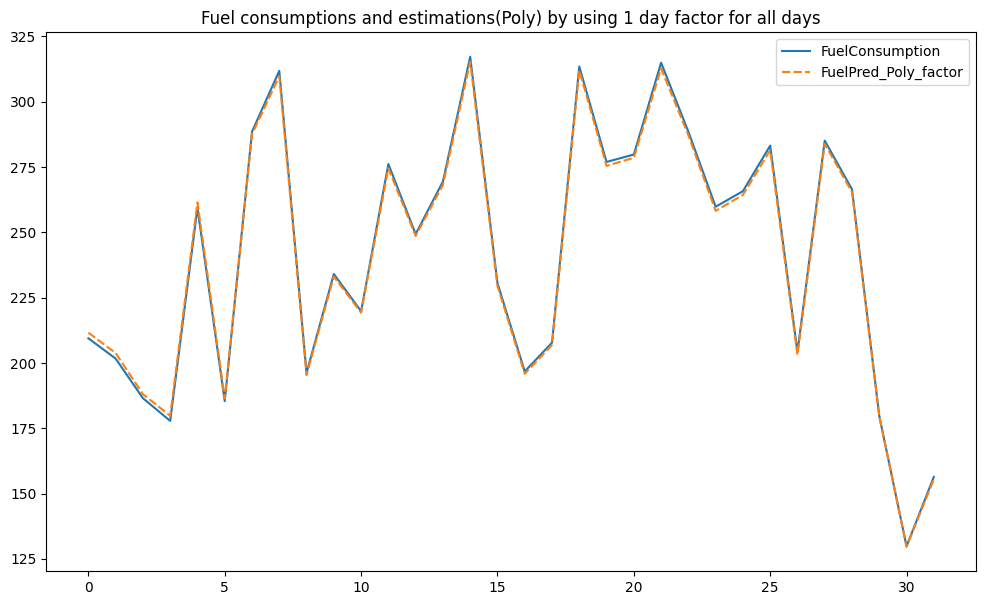

In [69]:
df_20201101_new_predict_days["FuelPred_Poly_factor"] = df_20201101_new_predict_days["FuelPred_Poly"]*factor_day_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_days[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day factor for all days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 week factor for all days')]

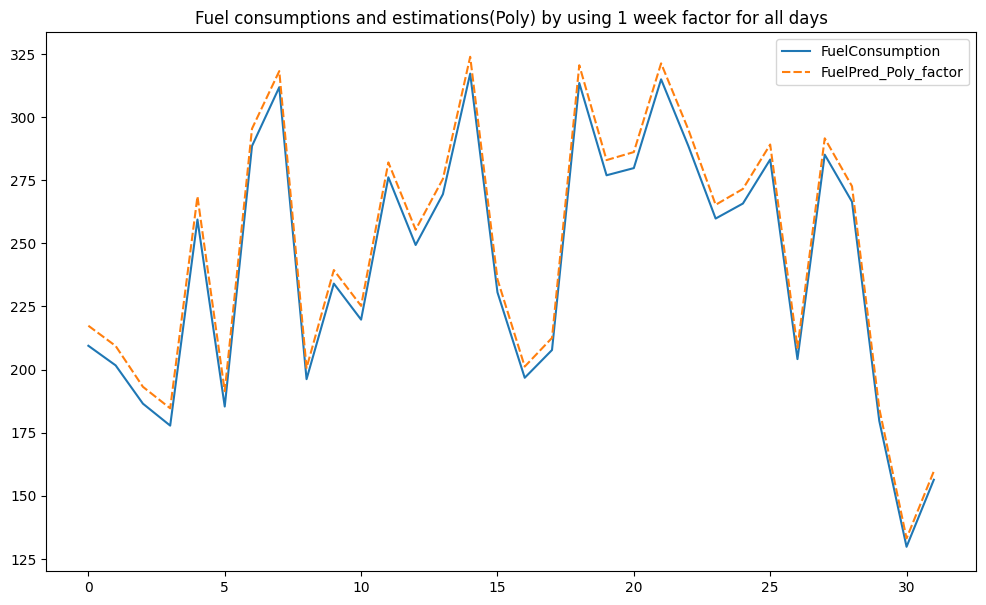

In [70]:
df_20201101_new_predict_days["FuelPred_Poly_factor"] = df_20201101_new_predict_days["FuelPred_Poly"]*factor_week_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_days[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 week factor for all days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 2 week factor for all days')]

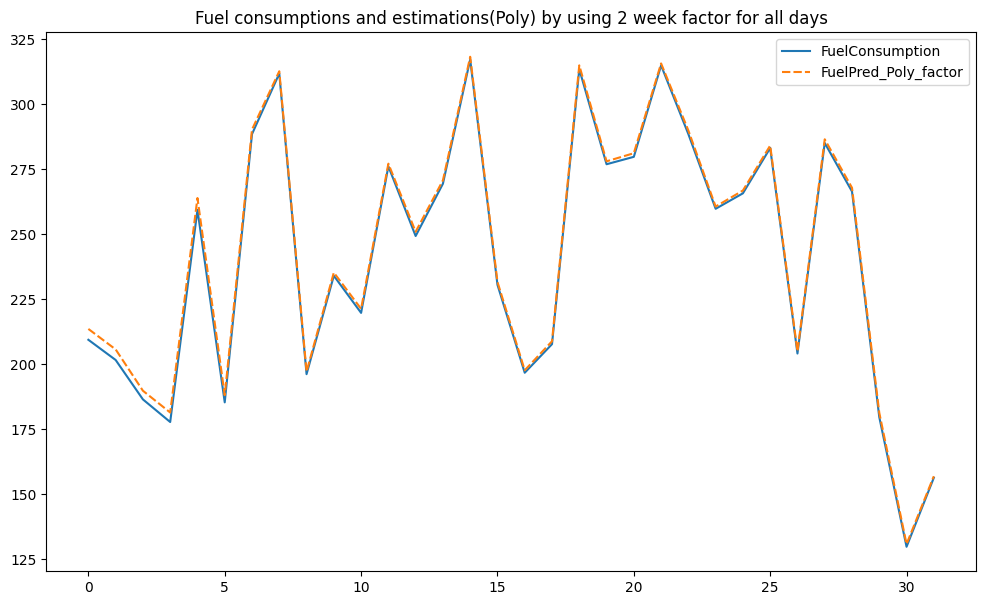

In [71]:
df_20201101_new_predict_days["FuelPred_Poly_factor"] = df_20201101_new_predict_days["FuelPred_Poly"]*factor_2_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_days[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 2 week factor for all days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 3 week factor for all days')]

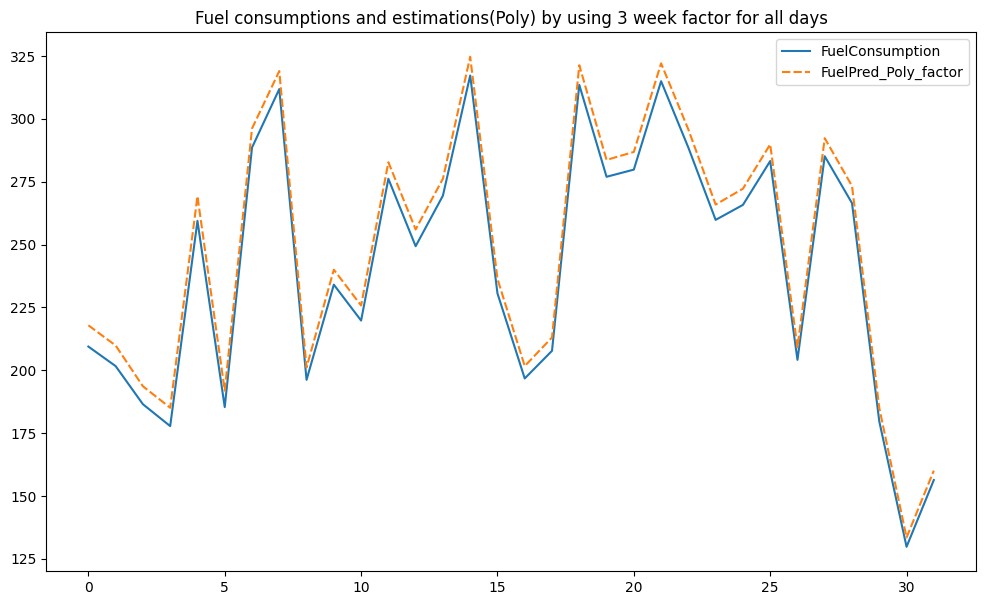

In [72]:
df_20201101_new_predict_days["FuelPred_Poly_factor"] = df_20201101_new_predict_days["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_days[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 3 week factor for all days")

- for weeks

In [73]:
df_20201101_new_predict_weeks = df_20201101_new_predict.groupby(pd.Grouper(freq = 'w')).sum().reset_index()
df_20201101_new_predict_weeks.head(3)

timestamp  engineTotalFuelUsed  engineActualPercentTorque   engineSpeed  \
0 2020-11-01         8.242656e+10               1.778616e+07  6.466989e+08   
1 2020-11-08         3.090655e+10               3.803656e+07  1.258094e+09   
2 2020-11-15         2.795703e+09               3.956512e+07  1.309782e+09   

   speedOverGround  engineFuelRate  FuelConsumption   FuelPred_SVD  \
0     1.301963e+06    9.305285e+06       775.440438  114635.471164   
1     2.506646e+06    2.034299e+07      1695.249200  267707.733857   
2     2.651741e+06    2.096765e+07      1747.304368  275603.457595   

   FuelPred_Poly   FuelPred_knn  FuelPred_tree   FuelPred_gbr  FuelPred_xgbr  \
0   130934.77753  131559.052128  128503.253673  132327.631008  131201.984375   
1   283001.41152  283788.829787  275140.811171  286316.708088  286314.031250   
2   290710.32259  291033.868085  282688.276529  291544.652465  289863.687500   

    FuelPred_rfr  engineFuelUsed  
0  130285.694561           840.5  
1  281738.528242       8520643.5  
2  287813.327320          1870.0

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day factor for weeks')]

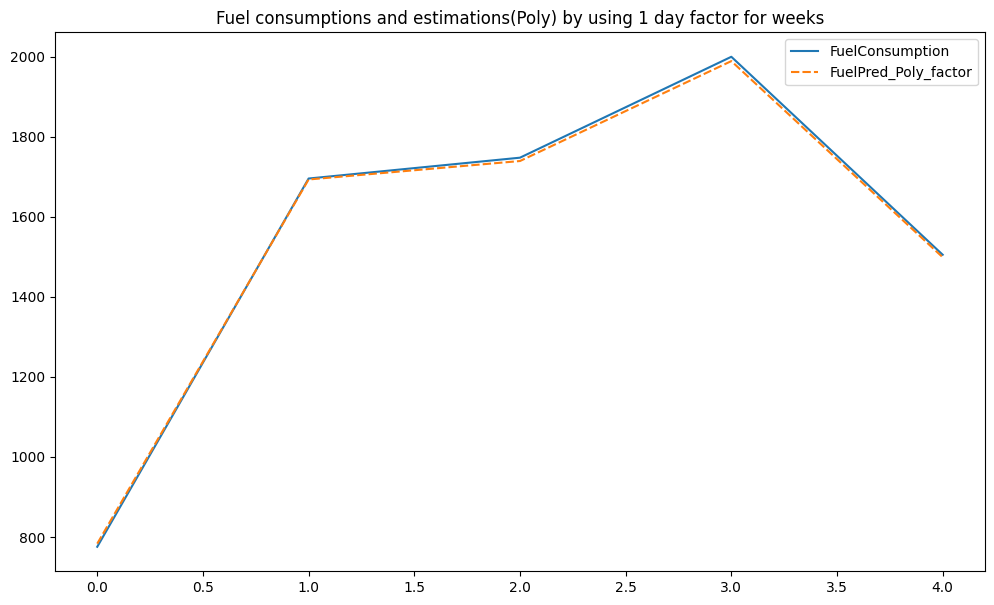

In [74]:
df_20201101_new_predict_weeks["FuelPred_Poly_factor"] = df_20201101_new_predict_weeks["FuelPred_Poly"]*factor_day_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_weeks[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day factor for weeks")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 week factor for weeks')]

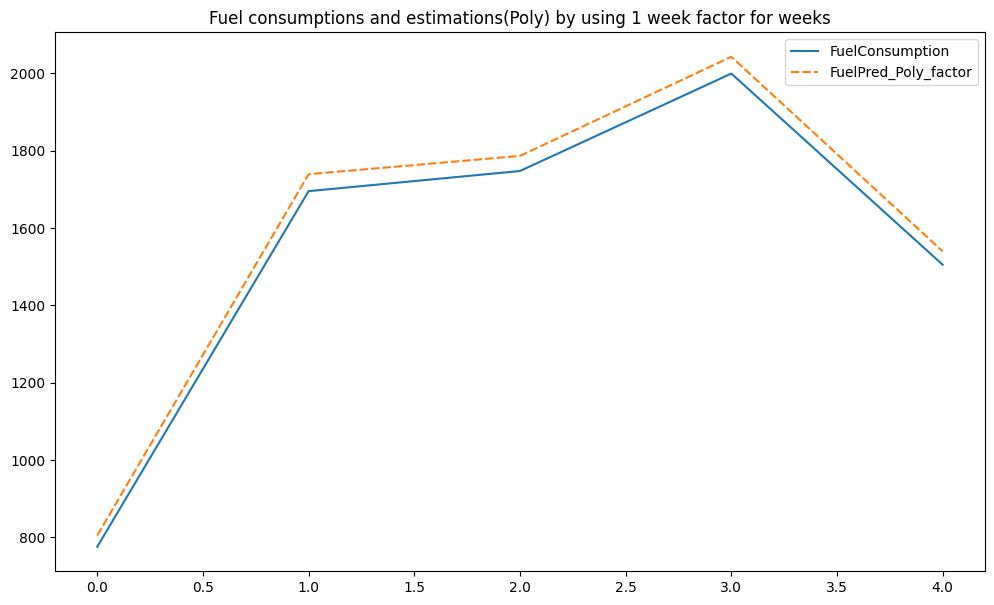

In [75]:
df_20201101_new_predict_weeks["FuelPred_Poly_factor"] = df_20201101_new_predict_weeks["FuelPred_Poly"]*factor_week_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_weeks[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 week factor for weeks")

In [76]:
df_20201101_new_predict_weeks["FuelPred_Poly_factor"] = df_20201101_new_predict_weeks["FuelPred_Poly"]*factor_2_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_weeks[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 2 weeks factor for weeks")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 2 weeks factor for weeks')]

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 3 weeks factor for weeks')]

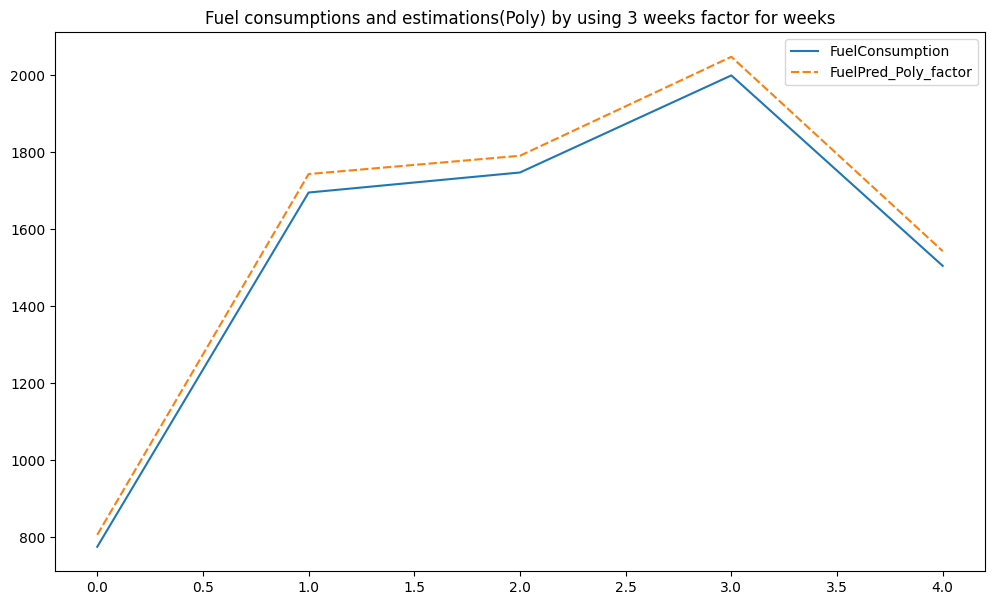

In [77]:
df_20201101_new_predict_weeks["FuelPred_Poly_factor"] = df_20201101_new_predict_weeks["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_weeks[["FuelConsumption","FuelPred_Poly_factor"]]).set(title = "Fuel consumptions and estimations(Poly) by using 3 weeks factor for weeks")

## Predictions in 3st speed levels

In [80]:
df_20201101_new_predict_speed_1 = df_20201101_new_predict.loc[(df_20201101_new_predict.speedOverGround >= 0)&(df_20201101_new_predict.speedOverGround < 2)]
df_20201101_new_predict_speed_2 = df_20201101_new_predict.loc[(df_20201101_new_predict.speedOverGround >= 2)&(df_20201101_new_predict.speedOverGround < 4)]
df_20201101_new_predict_speed_3 = df_20201101_new_predict.loc[(df_20201101_new_predict.speedOverGround >= 4)&(df_20201101_new_predict.speedOverGround < 6)]

df_20201101_new_predict_speed_1.shape, df_20201101_new_predict_speed_2.shape, df_20201101_new_predict_speed_3.shape

((2550840, 14), (1663137, 14), (1085309, 14))

In [83]:
df_20201101_new_predict_speed_1_days = df_20201101_new_predict_speed_1.groupby(pd.Grouper(freq = 'd')).sum().reset_index()
df_20201101_new_predict_speed_2_days = df_20201101_new_predict_speed_2.groupby(pd.Grouper(freq = 'd')).sum().reset_index()
df_20201101_new_predict_speed_3_days = df_20201101_new_predict_speed_3.groupby(pd.Grouper(freq = 'd')).sum().reset_index()

In [89]:
df_20201101_new_predict_speed_1_days["FuelPred_Poly_factor_1_day"] = df_20201101_new_predict_speed_1_days["FuelPred_Poly"]*factor_day_Poly
df_20201101_new_predict_speed_1_days["FuelPred_Poly_factor_1_week"] = df_20201101_new_predict_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_1_days["FuelPred_Poly_factor_2_weeks"] = df_20201101_new_predict_speed_1_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20201101_new_predict_speed_1_days["FuelPred_Poly_factor_3_weeks"] = df_20201101_new_predict_speed_1_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_1_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for lower speed by days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for lower speed by days')]

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for middle speed by days')]

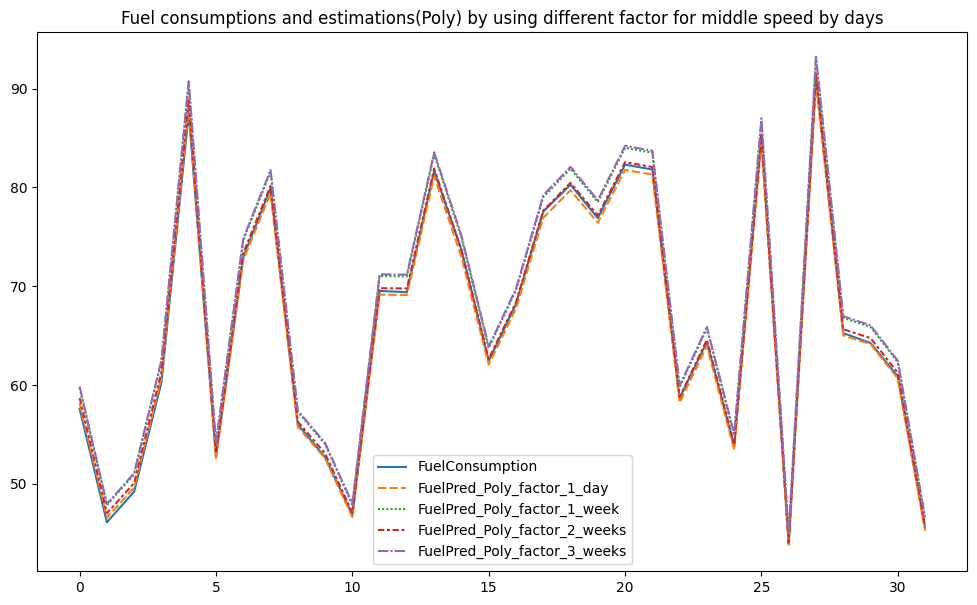

In [90]:
df_20201101_new_predict_speed_2_days["FuelPred_Poly_factor_1_day"] = df_20201101_new_predict_speed_2_days["FuelPred_Poly"]*factor_day_Poly
df_20201101_new_predict_speed_2_days["FuelPred_Poly_factor_1_week"] = df_20201101_new_predict_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_2_days["FuelPred_Poly_factor_2_weeks"] = df_20201101_new_predict_speed_2_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20201101_new_predict_speed_2_days["FuelPred_Poly_factor_3_weeks"] = df_20201101_new_predict_speed_2_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_2_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for middle speed by days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for high speed by days')]

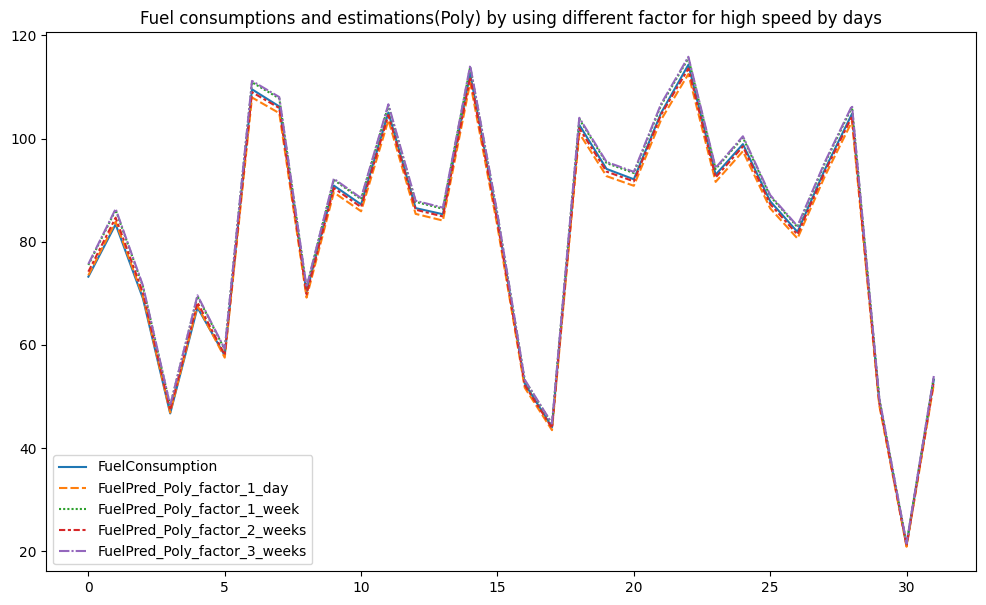

In [101]:
df_20201101_new_predict_speed_3_days["FuelPred_Poly_factor_1_day"] = df_20201101_new_predict_speed_3_days["FuelPred_Poly"]*factor_day_Poly
df_20201101_new_predict_speed_3_days["FuelPred_Poly_factor_1_week"] = df_20201101_new_predict_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_3_days["FuelPred_Poly_factor_2_weeks"] = df_20201101_new_predict_speed_3_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20201101_new_predict_speed_3_days["FuelPred_Poly_factor_3_weeks"] = df_20201101_new_predict_speed_3_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_3_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for high speed by days")

## Compare with different models in different speed

In [161]:
factor_week_SVD = (fuel_week/df_20201101_weeks["FuelPred_SVD"][0]).round(7)
factor_week_Poly= (fuel_week/df_20201101_weeks["FuelPred_Poly"][0]).round(7)
factor_week_knn = (fuel_week/df_20201101_weeks["FuelPred_knn"][0]).round(7)
factor_week_tree = (fuel_week/df_20201101_weeks["FuelPred_tree"][0]).round(7)
factor_week_gbr = (fuel_week/df_20201101_weeks["FuelPred_gbr"][0]).round(7)
factor_week_xgbr = (fuel_week/df_20201101_weeks["FuelPred_xgbr"][0]).round(7)
factor_week_rfr = (fuel_week/df_20201101_weeks["FuelPred_rfr"][0]).round(7)
factor_week_Poly, factor_week_SVD, factor_week_knn, factor_week_tree, factor_week_gbr, factor_week_xgbr, factor_week_rfr

(0.0061449, 0.0068995, 0.0061651, 0.0062811, 0.0061412, 0.0061511, 0.0062157)

In [162]:
df_20201101_new_predict_speed_1_days["FuelPred_SVD_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_SVD"]*factor_week_SVD
df_20201101_new_predict_speed_1_days["FuelPred_Poly_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_1_days["FuelPred_KNN_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_knn"]*factor_week_knn
df_20201101_new_predict_speed_1_days["FuelPred_Tree_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_tree"]*factor_week_tree
df_20201101_new_predict_speed_1_days["FuelPred_gbr_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_gbr"]*factor_week_gbr
df_20201101_new_predict_speed_1_days["FuelPred_xgbr_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_xgbr"]*factor_week_xgbr
df_20201101_new_predict_speed_1_days["FuelPred_rfr_factor"] = df_20201101_new_predict_speed_1_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_1_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for lower speed by days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for lower speed by days')]

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for middle speed by days')]

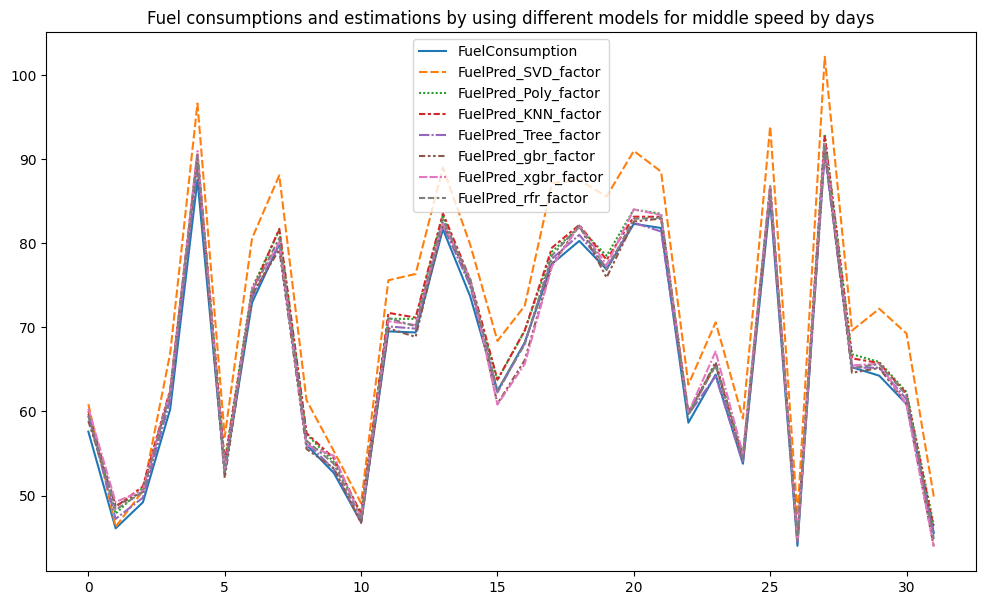

In [163]:
df_20201101_new_predict_speed_2_days["FuelPred_SVD_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_SVD"]*factor_week_SVD
df_20201101_new_predict_speed_2_days["FuelPred_Poly_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_2_days["FuelPred_KNN_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_knn"]*factor_week_knn
df_20201101_new_predict_speed_2_days["FuelPred_Tree_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_tree"]*factor_week_tree
df_20201101_new_predict_speed_2_days["FuelPred_gbr_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_gbr"]*factor_week_gbr
df_20201101_new_predict_speed_2_days["FuelPred_xgbr_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_xgbr"]*factor_week_xgbr
df_20201101_new_predict_speed_2_days["FuelPred_rfr_factor"] = df_20201101_new_predict_speed_2_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_2_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for middle speed by days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for middle speed by days')]

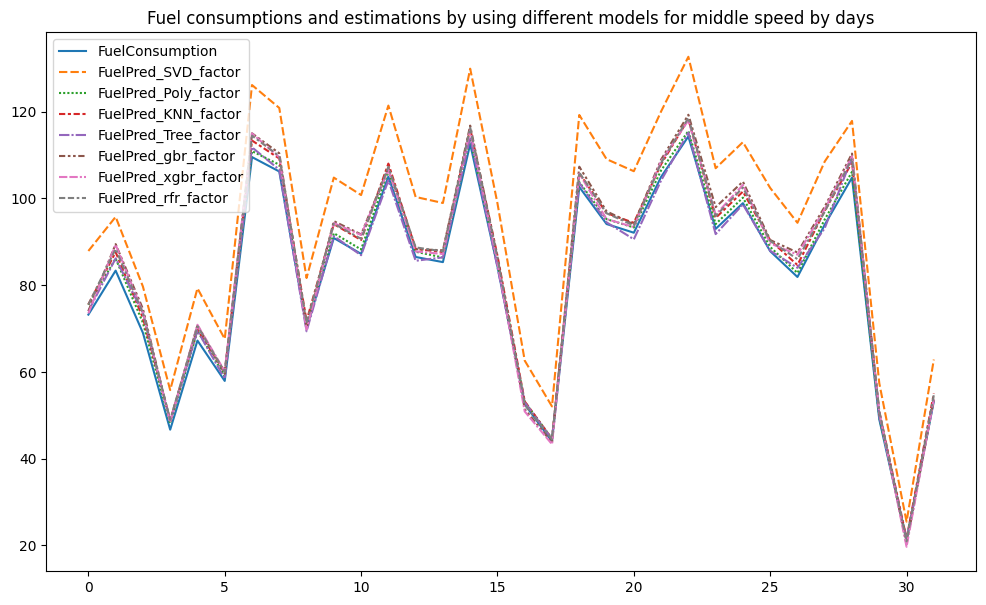

In [165]:
df_20201101_new_predict_speed_3_days["FuelPred_SVD_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_SVD"]*factor_week_SVD
df_20201101_new_predict_speed_3_days["FuelPred_Poly_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20201101_new_predict_speed_3_days["FuelPred_KNN_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_knn"]*factor_week_knn
df_20201101_new_predict_speed_3_days["FuelPred_Tree_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_tree"]*factor_week_tree
df_20201101_new_predict_speed_3_days["FuelPred_gbr_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_gbr"]*factor_week_gbr
df_20201101_new_predict_speed_3_days["FuelPred_xgbr_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_xgbr"]*factor_week_xgbr
df_20201101_new_predict_speed_3_days["FuelPred_rfr_factor"] = df_20201101_new_predict_speed_3_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20201101_new_predict_speed_3_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for middle speed by days")

In [ ]:
# df_20201101_2days["FuelPred_SVD_factor"] = df_20201101_2days["FuelPred_SVD"]*factor_week_SVD
# df_20201101_2days["FuelPred_Poly_factor"] = df_20201101_2days["FuelPred_Poly"]*factor_week_Poly
# df_20201101_2days["FuelPred_knn_factor"] = df_20201101_2days["FuelPred_knn"]*factor_week_knn
# df_20201101_2days["FuelPred_tree_factor"] = df_20201101_2days["FuelPred_tree"]*factor_week_tree
# df_20201101_2days["FuelPred_gbr_factor"] = df_20201101_2days["FuelPred_gbr"]*factor_week_gbr
# df_20201101_2days["FuelPred_xgbr_factor"] = df_20201101_2days["FuelPred_xgbr"]*factor_week_xgbr
# df_20201101_2days["FuelPred_rfr_factor"] = df_20201101_2days["FuelPred_rfr"]*factor_week_rfr
# df_20201101_2days.head()

In [ ]:
# open_day='2020-09-25'
# close_day='2020-09-26'
# con1=df_20201101['timestamp']>=open_day
# con2=df_20201101['timestamp']<close_day
# df_20201101_0925 = df_20201101[con1&con2]

# df_20201101_0925 = df_20201101_0925.groupby(pd.Grouper(key = 'timestamp', freq = 'H')).sum().reset_index()

# df_20201101_0925["FuelPred_SVD_factor"] = df_20201101_0925["FuelPred_SVD"]*factor_week_SVD
# df_20201101_0925["FuelPred_Poly_factor"] = df_20201101_0925["FuelPred_Poly"]*factor_week_Poly
# df_20201101_0925["FuelPred_knn_factor"] = df_20201101_0925["FuelPred_knn"]*factor_week_knn
# df_20201101_0925["FuelPred_tree_factor"] = df_20201101_0925["FuelPred_tree"]*factor_week_tree
# df_20201101_0925["FuelPred_gbr_factor"] = df_20201101_0925["FuelPred_gbr"]*factor_week_gbr
# df_20201101_0925["FuelPred_xgbr_factor"] = df_20201101_0925["FuelPred_xgbr"]*factor_week_xgbr
# df_20201101_0925["FuelPred_rfr_factor"] = df_20201101_0925["FuelPred_rfr"]*factor_week_rfr

# plt.figure(figsize=(12, 7))
# sns.lineplot(data=df_20201101_0925[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor", "FuelPred_knn_factor", "FuelPred_tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Real Fuel consumptions and estimations in every hour during 2020-09-25")

## Predict on July data

In [1]:
df_20200707 = pd.read_csv(r'C:\Users\Kun\Downloads\data_v3\df_20200707.csv')
df_20200707.head()

NameError: name 'pd' is not defined

In [103]:
df_20200707 = df_20200707[["timestamp", "engineActualPercentTorque",'engineSpeed', 'speedOverGround', 'engineFuelRate']]

In [104]:
df_20200707['timestamp'] = pd.to_datetime(df_20200707['timestamp'])

C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\4034999469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20200707['timestamp'] = pd.to_datetime(df_20200707['timestamp'])


In [105]:
df_20200707['FuelConsumption'] = df_20200707['engineFuelRate']*0.3/3600

C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\2538496430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20200707['FuelConsumption'] = df_20200707['engineFuelRate']*0.3/3600


In [106]:
X_july, y_july = df_20200707[["engineSpeed", "engineActualPercentTorque"]], df_20200707[["engineFuelRate"]]
X_july.shape, y_july.shape

((3027170, 2), (3027170, 1))

In [107]:
scaler.fit(X_july)

scaled_X_july = scaler.transform(X_july)

print(f"{scaled_X_july.min():.2f} ≤ scaled_X ≤ {scaled_X_july.max():.2f}")

0.00 ≤ scaled_X ≤ 1.00


In [121]:
scaler.fit(y_july)

scaled_y_july = scaler.transform(y_july)

print(f"{scaled_y_july.min():.2f} ≤ scaled_y ≤ {scaled_y_july.max():.2f}")

0.00 ≤ scaled_y ≤ 1.00


## Models

In [123]:
poly_model_3 = PolynomialFeatures(3, include_bias=False)
X_features_july = poly_model_3.fit_transform(scaled_X_july)

score_poly_july = model_poly.score(X_features_july,scaled_y_july)

pred_poly_july = model_poly.predict(X_features_july)
mae_poly_july = mean_absolute_error(scaled_y_july, pred_poly_july)

print(f"Poly, score: {score_poly_july:.7f}, MAE: {mae_poly_july:.7f}")

Poly, score: 0.8728752, MAE: 0.0466069


In [124]:
df_20200707['FuelPred_Poly'] = pred_poly_july

C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\2426628186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20200707['FuelPred_Poly'] = pred_poly_july


In [167]:
pred_SVD_july = model_SVD.predict(scaled_X_july)

In [168]:
pred_knn_july = model_knn.predict(scaled_X_july)

In [169]:
pred_trees_july = model_trees.predict(scaled_X_july)

In [170]:
pred_gbr_july = model_gbr.predict(scaled_X_july)

In [171]:
pred_xgbr_july = model_xgbr.predict(scaled_X_july)

In [172]:
pred_rfr_july = model_rfr.predict(scaled_X_july)

In [173]:
df_20200707['FuelPred_SVD'] = pred_SVD_july

df_20200707['FuelPred_Poly'] = pred_poly_july

df_20200707['FuelPred_knn'] = pred_knn_july

df_20200707['FuelPred_tree'] = pred_trees_july

df_20200707['FuelPred_gbr'] = pred_gbr_july

df_20200707['FuelPred_xgbr'] = pred_xgbr_july

df_20200707['FuelPred_rfr'] = pred_rfr_july

df_20200707.columns

C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\4011715115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20200707['FuelPred_SVD'] = pred_SVD_july
C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\4011715115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20200707['FuelPred_Poly'] = pred_poly_july
C:\Users\Kun\AppData\Local\Temp\ipykernel_6880\4011715115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Index(['timestamp', 'engineActualPercentTorque', 'engineSpeed',
       'speedOverGround', 'engineFuelRate', 'FuelConsumption', 'FuelPred_Poly',
       'FuelPred_SVD', 'FuelPred_knn', 'FuelPred_tree', 'FuelPred_gbr',
       'FuelPred_xgbr', 'FuelPred_rfr'],
      dtype='object')

### Predictions for days in July with 4st factors

In [178]:
df_20200707_predict_days = df_20200707.groupby(pd.Grouper(key = "timestamp", freq = 'd')).sum().reset_index()
df_20200707_predict_days.head(3)

timestamp  engineActualPercentTorque   engineSpeed  speedOverGround  \
0 2020-07-07               1.182080e+05  4.940525e+06      7560.575000   
1 2020-07-08               5.664019e+06  2.055281e+08    420655.672738   
2 2020-07-09               4.165394e+06  1.870597e+08    421970.299167   

   engineFuelRate  FuelConsumption  FuelPred_Poly  FuelPred_SVD  FuelPred_knn  \
0    6.069518e+04         5.057932    1026.929045    830.769245   1036.539362   
1    3.084067e+06       257.005617   52114.845780  48894.837035  52086.219149   
2    1.977698e+06       164.808171   33893.091644  31969.591827  34249.314894   

   FuelPred_tree  FuelPred_gbr  FuelPred_xgbr  FuelPred_rfr  
0     995.235353   1075.502428    1085.952393   1038.788173  
1   51899.768419  52413.703330   53346.230469  51954.131604  
2   33742.014133  34473.763089   35244.953125  34234.074840

In [128]:
df_20200707_predict_days["FuelPred_Poly_factor_day"] = df_20200707_predict_days["FuelPred_Poly"]*factor_day_Poly
df_20200707_predict_days["FuelPred_Poly_factor_week"] = df_20200707_predict_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_predict_days["FuelPred_Poly_factor_2_weeks"] = df_20200707_predict_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200707_predict_days["FuelPred_Poly_factor_3_weeks"] = df_20200707_predict_days["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_predict_days[["FuelConsumption","FuelPred_Poly_factor_day", "FuelPred_Poly_factor_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all days in July")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all days in July')]

### Predictions for weeks in July with 4st factors

In [129]:
df_20200707_predict_weeks = df_20200707.groupby(pd.Grouper(key = "timestamp", freq = 'w')).sum().reset_index()
df_20200707_predict_weeks.head(3)

timestamp  engineActualPercentTorque   engineSpeed  speedOverGround  \
0 2020-07-12               2.210939e+07  9.084763e+08     1.972333e+06   
1 2020-07-19               3.339707e+07  1.329604e+09     2.829581e+06   
2 2020-07-26               2.163305e+07  8.500561e+08     1.814111e+06   

   engineFuelRate  FuelConsumption  FuelPred_Poly  
0    1.132282e+07       943.568201  192270.149470  
1    1.760139e+07      1466.782738  297871.292197  
2    1.166466e+07       972.054760  197106.771904

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all weeks in July')]

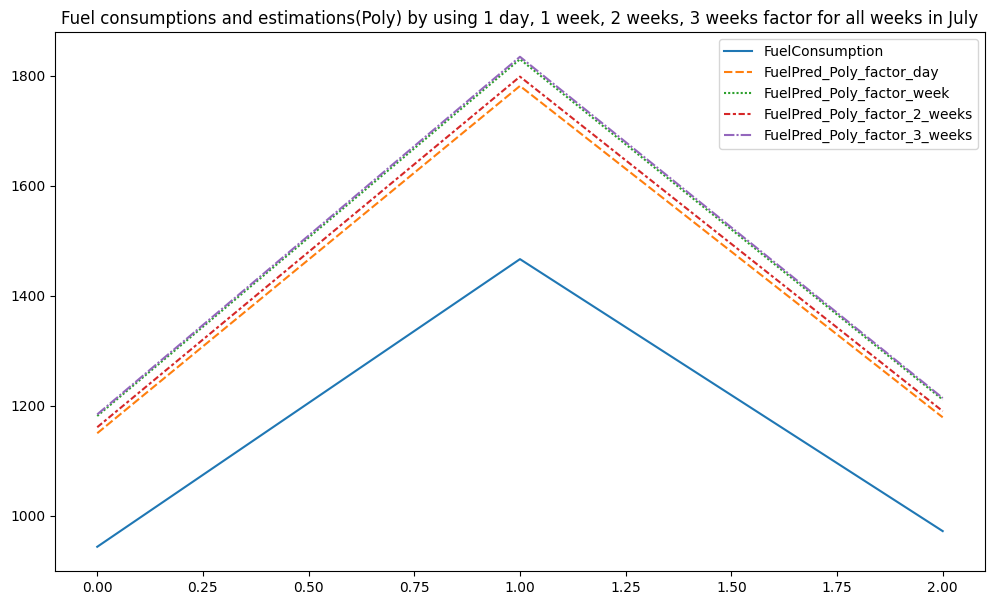

In [130]:
df_20200707_predict_weeks["FuelPred_Poly_factor_day"] = df_20200707_predict_weeks["FuelPred_Poly"]*factor_day_Poly
df_20200707_predict_weeks["FuelPred_Poly_factor_week"] = df_20200707_predict_weeks["FuelPred_Poly"]*factor_week_Poly
df_20200707_predict_weeks["FuelPred_Poly_factor_2_weeks"] = df_20200707_predict_weeks["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200707_predict_weeks["FuelPred_Poly_factor_3_weeks"] = df_20200707_predict_weeks["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_predict_weeks[["FuelConsumption","FuelPred_Poly_factor_day", "FuelPred_Poly_factor_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all weeks in July")

### 3st speed levels

In [179]:
df_20200707_speed_1 = df_20200707.loc[(df_20200707.speedOverGround >= 0)&(df_20200707.speedOverGround < 2)]
df_20200707_speed_2 = df_20200707.loc[(df_20200707.speedOverGround >= 2)&(df_20200707.speedOverGround < 4)]
df_20200707_speed_3 = df_20200707.loc[(df_20200707.speedOverGround >= 4)&(df_20200707.speedOverGround < 6)]

df_20200707_speed_1.shape, df_20200707_speed_2.shape, df_20200707_speed_3.shape

((1456730, 13), (872462, 13), (697978, 13))

In [184]:
df_20200707_speed_1_days = df_20200707_speed_1.groupby(pd.Grouper(key = "timestamp", freq = 'd')).sum().reset_index()
df_20200707_speed_2_days = df_20200707_speed_2.groupby(pd.Grouper(key = "timestamp",freq = 'd')).sum().reset_index()
df_20200707_speed_3_days = df_20200707_speed_3.groupby(pd.Grouper(key = "timestamp",freq = 'd')).sum().reset_index()

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for lower speed by days in July')]

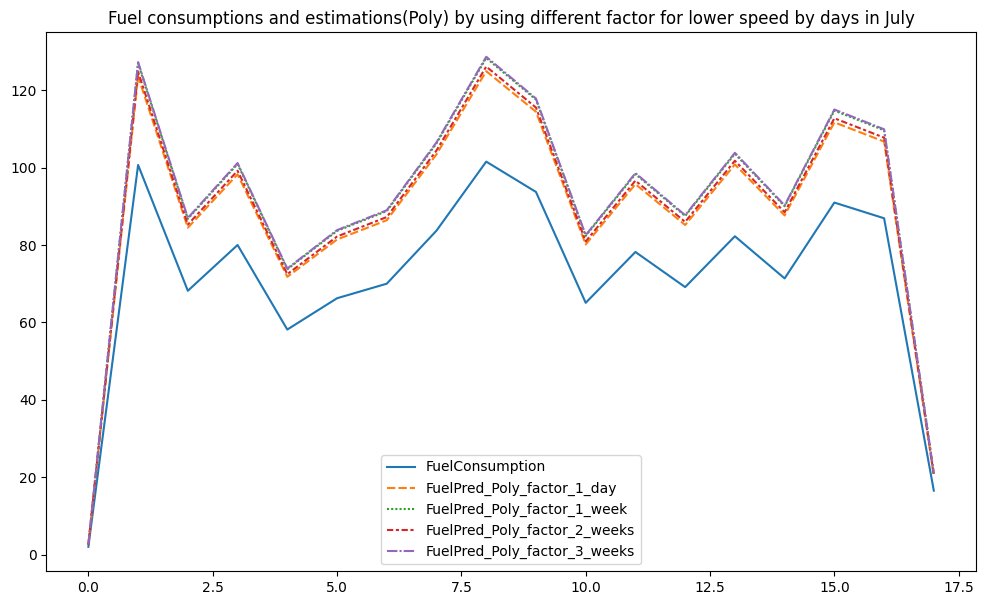

In [137]:
df_20200707_speed_1_days["FuelPred_Poly_factor_1_day"] = df_20200707_speed_1_days["FuelPred_Poly"]*factor_day_Poly
df_20200707_speed_1_days["FuelPred_Poly_factor_1_week"] = df_20200707_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_1_days["FuelPred_Poly_factor_2_weeks"] = df_20200707_speed_1_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200707_speed_1_days["FuelPred_Poly_factor_3_weeks"] = df_20200707_speed_1_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_1_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for lower speed by days in July")

In [138]:
df_20200707_speed_2_days["FuelPred_Poly_factor_1_day"] = df_20200707_speed_2_days["FuelPred_Poly"]*factor_day_Poly
df_20200707_speed_2_days["FuelPred_Poly_factor_1_week"] = df_20200707_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_2_days["FuelPred_Poly_factor_2_weeks"] = df_20200707_speed_2_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200707_speed_2_days["FuelPred_Poly_factor_3_weeks"] = df_20200707_speed_2_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_2_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for middle speed by days in July")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for middle speed by days in July')]

In [139]:
df_20200707_speed_3_days["FuelPred_Poly_factor_1_day"] = df_20200707_speed_3_days["FuelPred_Poly"]*factor_day_Poly
df_20200707_speed_3_days["FuelPred_Poly_factor_1_week"] = df_20200707_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_3_days["FuelPred_Poly_factor_2_weeks"] = df_20200707_speed_3_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200707_speed_3_days["FuelPred_Poly_factor_3_weeks"] = df_20200707_speed_3_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_3_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for high speed by days in July")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for high speed by days in July')]

### Compare with different models in different speed

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for low speed by days in July')]

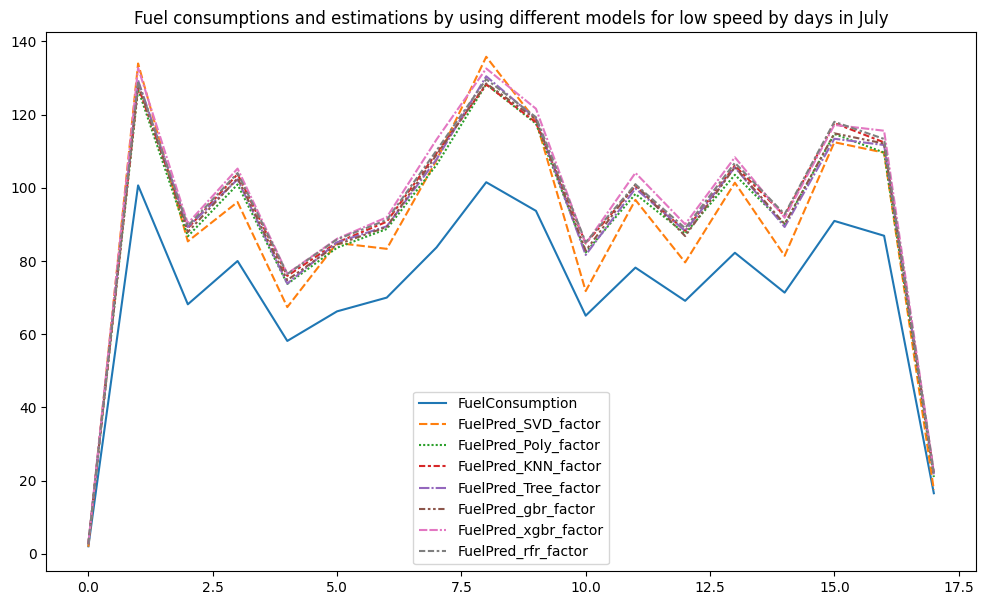

In [182]:
df_20200707_speed_1_days["FuelPred_SVD_factor"] = df_20200707_speed_1_days["FuelPred_SVD"]*factor_week_SVD
df_20200707_speed_1_days["FuelPred_Poly_factor"] = df_20200707_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_1_days["FuelPred_KNN_factor"] = df_20200707_speed_1_days["FuelPred_knn"]*factor_week_knn
df_20200707_speed_1_days["FuelPred_Tree_factor"] = df_20200707_speed_1_days["FuelPred_tree"]*factor_week_tree
df_20200707_speed_1_days["FuelPred_gbr_factor"] = df_20200707_speed_1_days["FuelPred_gbr"]*factor_week_gbr
df_20200707_speed_1_days["FuelPred_xgbr_factor"] = df_20200707_speed_1_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200707_speed_1_days["FuelPred_rfr_factor"] = df_20200707_speed_1_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_1_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for low speed by days in July")

In [183]:
df_20200707_speed_2_days["FuelPred_SVD_factor"] = df_20200707_speed_2_days["FuelPred_SVD"]*factor_week_SVD
df_20200707_speed_2_days["FuelPred_Poly_factor"] = df_20200707_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_2_days["FuelPred_KNN_factor"] = df_20200707_speed_2_days["FuelPred_knn"]*factor_week_knn
df_20200707_speed_2_days["FuelPred_Tree_factor"] = df_20200707_speed_2_days["FuelPred_tree"]*factor_week_tree
df_20200707_speed_2_days["FuelPred_gbr_factor"] = df_20200707_speed_2_days["FuelPred_gbr"]*factor_week_gbr
df_20200707_speed_2_days["FuelPred_xgbr_factor"] = df_20200707_speed_2_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200707_speed_2_days["FuelPred_rfr_factor"] = df_20200707_speed_2_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_2_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for middle speed by days in July")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for middle speed by days in July')]

In [185]:
df_20200707_speed_3_days["FuelPred_SVD_factor"] = df_20200707_speed_3_days["FuelPred_SVD"]*factor_week_SVD
df_20200707_speed_3_days["FuelPred_Poly_factor"] = df_20200707_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20200707_speed_3_days["FuelPred_KNN_factor"] = df_20200707_speed_3_days["FuelPred_knn"]*factor_week_knn
df_20200707_speed_3_days["FuelPred_Tree_factor"] = df_20200707_speed_3_days["FuelPred_tree"]*factor_week_tree
df_20200707_speed_3_days["FuelPred_gbr_factor"] = df_20200707_speed_3_days["FuelPred_gbr"]*factor_week_gbr
df_20200707_speed_3_days["FuelPred_xgbr_factor"] = df_20200707_speed_3_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200707_speed_3_days["FuelPred_rfr_factor"] = df_20200707_speed_3_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200707_speed_3_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for high speed by days in July")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for high speed by days in July')]

## January

In [140]:
df_20200116 = pd.read_csv(r'C:\Users\Kun\Downloads\data_v3\df_20200116.csv')
df_20200116.head()

Unnamed: 0                timestamp  engineActualPercentTorque  \
0           0  2020-01-16 13:09:39.600                  23.866667   
1           1  2020-01-16 13:09:39.900                  25.022222   
2           2  2020-01-16 13:09:40.200                  26.177778   
3           3  2020-01-16 13:09:40.500                  27.333333   
4           4  2020-01-16 13:09:40.800                  31.688889   

   engineSpeed  engineFuelRate  accelPedalPos  engineTripFuel  \
0   976.833333       10.200000      26.666667         69057.5   
1   971.438889       10.572222      26.577778         69057.5   
2   966.044444       10.944444      26.488889         69057.5   
3   960.650000       11.316667      26.400000         69057.5   
4  1015.700000       14.677778      30.155556         69057.5   

   engineTotalFuelUsed   latitude  longitude  ...              leg  legId  \
0              69057.5  57.710865  11.658788  ...  Öckerö-Kalvsund      1   
1              69057.5  57.710865  11.658788  ...  Öckerö-Kalvsund      1   
2              69057.5  57.710865  11.658788  ...  Öckerö-Kalvsund      1   
3              69057.5  57.710865  11.658788  ...  Öckerö-Kalvsund      1   
4              69057.5  57.710865  11.658788  ...  Öckerö-Kalvsund      1   

                                legUUID  distanceToNextDock  \
0  a36e612e-3482-4476-90e3-41efbea146c1         1453.201623   
1  a36e612e-3482-4476-90e3-41efbea146c1         1453.192977   
2  a36e612e-3482-4476-90e3-41efbea146c1         1453.186355   
3  a36e612e-3482-4476-90e3-41efbea146c1         1453.181369   
4  a36e612e-3482-4476-90e3-41efbea146c1         1453.177629   

   distanceToPreviousDock  segmentId                           segmentUUID  \
0               11.831588          2  4f60a514-9226-499b-ab1f-acf88c08ffdc   
1               11.840085          2  4f60a514-9226-499b-ab1f-acf88c08ffdc   
2               11.846031          2  4f60a514-9226-499b-ab1f-acf88c08ffdc   
3               11.850183          2  4f60a514-9226-499b-ab1f-acf88c08ffdc   
4               11.853298          2  4f60a514-9226-499b-ab1f-acf88c08ffdc   

   accumDistLeg  accumFuelLeg  accumTimeLeg  
0      0.017789      0.000850           0.3  
1      0.036325      0.001731           0.6  
2      0.055117      0.002643           0.9  
3      0.073665      0.003586           1.2  
4      0.091521      0.004809           1.5  

[5 rows x 43 columns]

In [141]:
df_20200116 = df_20200116[["timestamp", "engineActualPercentTorque",'engineSpeed', 'speedOverGround', 'engineFuelRate']]

In [142]:
df_20200116['timestamp'] = pd.to_datetime(df_20200116['timestamp'])

In [143]:
df_20200116['FuelConsumption'] = df_20200116['engineFuelRate']*0.3/3600

In [144]:
X_jan, y_jan = df_20200116[["engineSpeed", "engineActualPercentTorque"]], df_20200116[["engineFuelRate"]]
X_jan.shape, y_jan.shape

((4661167, 2), (4661167, 1))

In [145]:
scaler.fit(X_jan)

scaled_X_jan = scaler.transform(X_jan)

print(f"{scaled_X_jan.min():.2f} ≤ scaled_X ≤ {scaled_X_jan.max():.2f}")

0.00 ≤ scaled_X ≤ 1.00


In [146]:
scaler.fit(y_jan)

scaled_y_jan = scaler.transform(y_jan)

print(f"{scaled_y_jan.min():.2f} ≤ scaled_y ≤ {scaled_y_jan.max():.2f}")

0.00 ≤ scaled_y ≤ 1.00


## Models

In [147]:
poly_model_3 = PolynomialFeatures(3, include_bias=False)
X_features_jan = poly_model_3.fit_transform(scaled_X_jan)

score_poly_jan = model_poly.score(X_features_jan,scaled_y_jan)

pred_poly_jan = model_poly.predict(X_features_jan)
mae_poly_jan = mean_absolute_error(scaled_y_jan, pred_poly_jan)

print(f"Poly, score: {score_poly_jan:.7f}, MAE: {mae_poly_jan:.7f}")

Poly, score: 0.7112777, MAE: 0.0949870


In [148]:
df_20200116['FuelPred_Poly'] = pred_poly_jan

In [186]:
pred_SVD_jan = model_SVD.predict(scaled_X_jan)

In [187]:
pred_knn_jan = model_knn.predict(scaled_X_jan)

In [188]:
pred_trees_jan = model_trees.predict(scaled_X_jan)

In [189]:
pred_gbr_jan = model_gbr.predict(scaled_X_jan)

In [190]:
pred_xgbr_jan = model_xgbr.predict(scaled_X_jan)

In [191]:
pred_rfr_jan = model_rfr.predict(scaled_X_jan)

In [192]:
df_20200116['FuelPred_SVD'] = pred_SVD_jan

df_20200116['FuelPred_Poly'] = pred_poly_jan

df_20200116['FuelPred_knn'] = pred_knn_jan

df_20200116['FuelPred_tree'] = pred_trees_jan

df_20200116['FuelPred_gbr'] = pred_gbr_jan

df_20200116['FuelPred_xgbr'] = pred_xgbr_jan

df_20200116['FuelPred_rfr'] = pred_rfr_jan

df_20200116.columns

Index(['timestamp', 'engineActualPercentTorque', 'engineSpeed',
       'speedOverGround', 'engineFuelRate', 'FuelConsumption', 'FuelPred_Poly',
       'FuelPred_SVD', 'FuelPred_knn', 'FuelPred_tree', 'FuelPred_gbr',
       'FuelPred_xgbr', 'FuelPred_rfr'],
      dtype='object')

### Predictions for days in Jan with 4st factors

In [193]:
df_20200116_predict_days = df_20200116.groupby(pd.Grouper(key = "timestamp", freq = 'd')).sum().reset_index()
df_20200116_predict_days.head(3)

timestamp  engineActualPercentTorque   engineSpeed  speedOverGround  \
0 2020-01-16               3.344807e+06  1.218814e+08    269760.470952   
1 2020-01-17               6.234766e+06  1.991350e+08    387036.693929   
2 2020-01-18               5.211371e+06  1.762994e+08    351797.342262   

   engineFuelRate  FuelConsumption  FuelPred_Poly  FuelPred_SVD  FuelPred_knn  \
0    1.787433e+06       148.952752   36375.986366  35325.744668  36592.352128   
1    3.561153e+06       296.762756   69296.697217  65651.626260  68906.502128   
2    2.882159e+06       240.179936   57216.325399  54639.333834  57196.344681   

   FuelPred_tree  FuelPred_gbr  FuelPred_xgbr  FuelPred_rfr  
0   35589.789514  37475.520396   37833.324219  36204.025142  
1   68394.252724  69587.392007   70080.562500  68152.828903  
2   56399.415431  58369.024384   58602.464844  56586.918248

In [150]:
df_20200116_predict_days["FuelPred_Poly_factor_day"] = df_20200116_predict_days["FuelPred_Poly"]*factor_day_Poly
df_20200116_predict_days["FuelPred_Poly_factor_week"] = df_20200116_predict_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_predict_days["FuelPred_Poly_factor_2_weeks"] = df_20200116_predict_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200116_predict_days["FuelPred_Poly_factor_3_weeks"] = df_20200116_predict_days["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_predict_days[["FuelConsumption","FuelPred_Poly_factor_day", "FuelPred_Poly_factor_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all days in Jan")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all days in Jan')]

### Predictions for weeks in Jan with 4st factors

In [151]:
df_20200116_predict_weeks = df_20200116.groupby(pd.Grouper(key = "timestamp", freq = 'w')).sum().reset_index()
df_20200116_predict_weeks.head(3)

timestamp  engineActualPercentTorque   engineSpeed  speedOverGround  \
0 2020-01-19               1.950450e+07  6.699704e+08     1.379892e+06   
1 2020-01-26               3.552224e+07  1.302928e+09     2.775877e+06   
2 2020-02-02               2.605081e+07  9.668644e+08     2.104838e+06   

   engineFuelRate  FuelConsumption  FuelPred_Poly  
0    1.081324e+07       901.103456  215248.760535  
1    1.932065e+07      1610.053927  392853.625423  
2    1.383977e+07      1153.313887  283865.089480

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all weeks in Jan')]

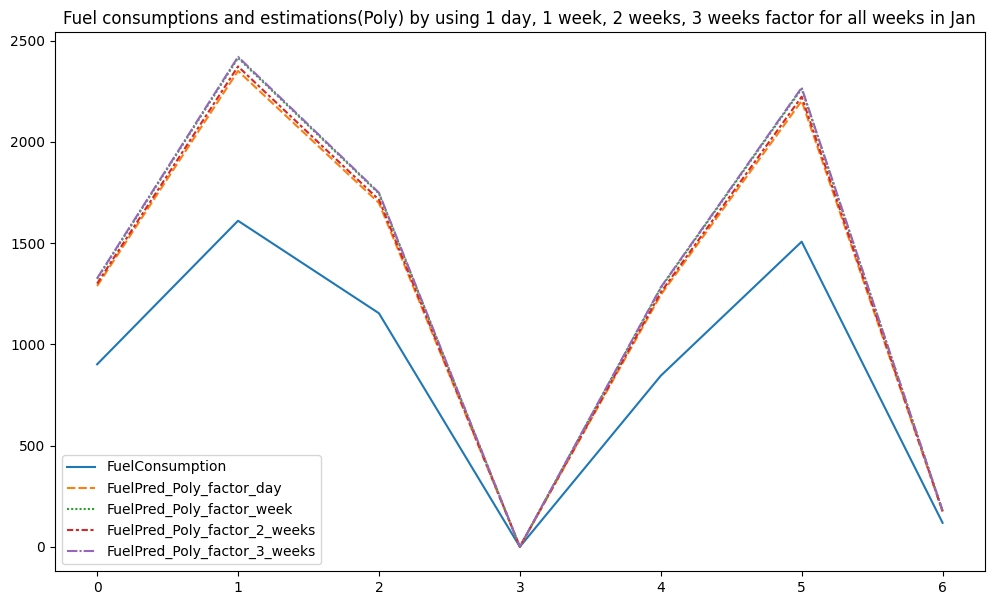

In [152]:
df_20200116_predict_weeks["FuelPred_Poly_factor_day"] = df_20200116_predict_weeks["FuelPred_Poly"]*factor_day_Poly
df_20200116_predict_weeks["FuelPred_Poly_factor_week"] = df_20200116_predict_weeks["FuelPred_Poly"]*factor_week_Poly
df_20200116_predict_weeks["FuelPred_Poly_factor_2_weeks"] = df_20200116_predict_weeks["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200116_predict_weeks["FuelPred_Poly_factor_3_weeks"] = df_20200116_predict_weeks["FuelPred_Poly"]*factor_3_weeks_Poly
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_predict_weeks[["FuelConsumption","FuelPred_Poly_factor_day", "FuelPred_Poly_factor_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using 1 day, 1 week, 2 weeks, 3 weeks factor for all weeks in Jan")

### 3st speed levels

In [194]:
df_20200116_speed_1 = df_20200116.loc[(df_20200116.speedOverGround >= 0)&(df_20200116.speedOverGround < 2)]
df_20200116_speed_2 = df_20200116.loc[(df_20200116.speedOverGround >= 2)&(df_20200116.speedOverGround < 4)]
df_20200116_speed_3 = df_20200116.loc[(df_20200116.speedOverGround >= 4)&(df_20200116.speedOverGround < 6)]

df_20200116_speed_1.shape, df_20200116_speed_2.shape, df_20200116_speed_3.shape

((2221661, 13), (1293662, 13), (1145716, 13))

In [195]:
df_20200116_speed_1_days = df_20200116_speed_1.groupby(pd.Grouper(key = "timestamp", freq = 'd')).sum().reset_index()
df_20200116_speed_2_days = df_20200116_speed_2.groupby(pd.Grouper(key = "timestamp",freq = 'd')).sum().reset_index()
df_20200116_speed_3_days = df_20200116_speed_3.groupby(pd.Grouper(key = "timestamp",freq = 'd')).sum().reset_index()

In [155]:
df_20200116_speed_1_days["FuelPred_Poly_factor_1_day"] = df_20200116_speed_1_days["FuelPred_Poly"]*factor_day_Poly
df_20200116_speed_1_days["FuelPred_Poly_factor_1_week"] = df_20200116_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_1_days["FuelPred_Poly_factor_2_weeks"] = df_20200116_speed_1_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200116_speed_1_days["FuelPred_Poly_factor_3_weeks"] = df_20200116_speed_1_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_1_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for lower speed by days in Jan")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for lower speed by days in Jan')]

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for middle speed by days in Jan')]

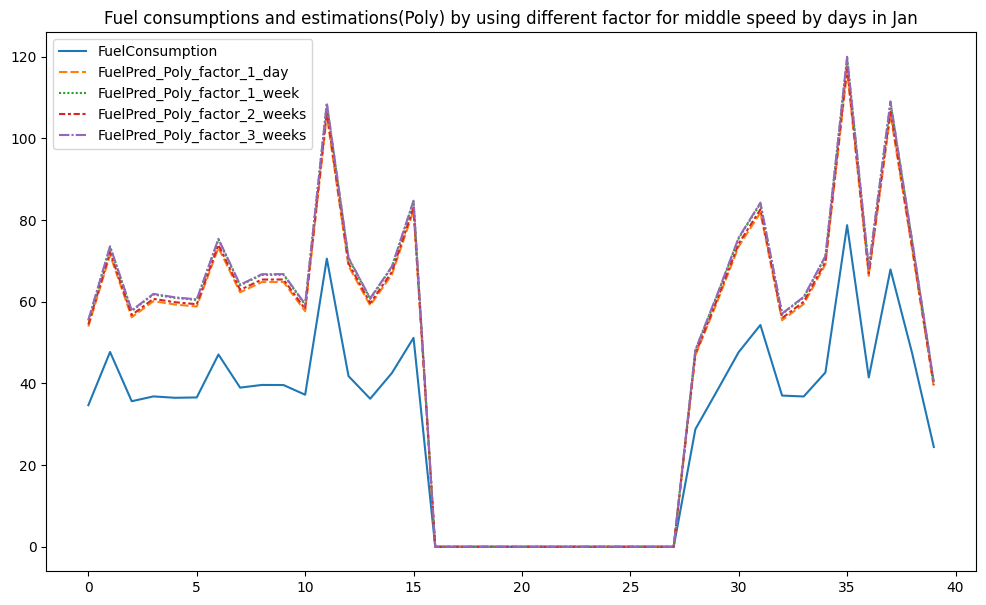

In [156]:
df_20200116_speed_2_days["FuelPred_Poly_factor_1_day"] = df_20200116_speed_2_days["FuelPred_Poly"]*factor_day_Poly
df_20200116_speed_2_days["FuelPred_Poly_factor_1_week"] = df_20200116_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_2_days["FuelPred_Poly_factor_2_weeks"] = df_20200116_speed_2_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200116_speed_2_days["FuelPred_Poly_factor_3_weeks"] = df_20200116_speed_2_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_2_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for middle speed by days in Jan")

[Text(0.5, 1.0, 'Fuel consumptions and estimations(Poly) by using different factor for high speed by days in Jan')]

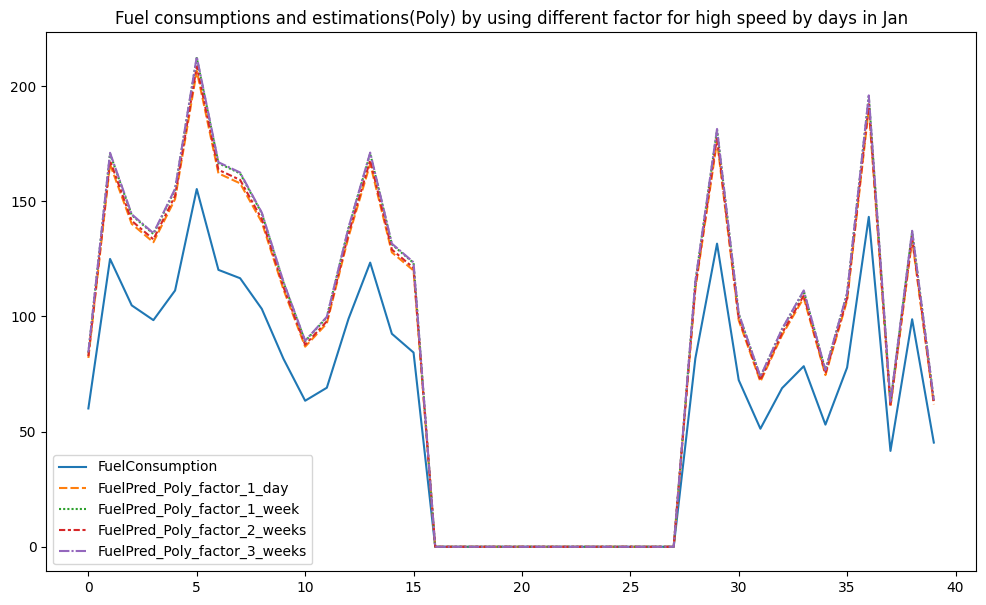

In [157]:
df_20200116_speed_3_days["FuelPred_Poly_factor_1_day"] = df_20200116_speed_3_days["FuelPred_Poly"]*factor_day_Poly
df_20200116_speed_3_days["FuelPred_Poly_factor_1_week"] = df_20200116_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_3_days["FuelPred_Poly_factor_2_weeks"] = df_20200116_speed_3_days["FuelPred_Poly"]*factor_2_weeks_Poly
df_20200116_speed_3_days["FuelPred_Poly_factor_3_weeks"] = df_20200116_speed_3_days["FuelPred_Poly"]*factor_3_weeks_Poly

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_3_days[["FuelConsumption","FuelPred_Poly_factor_1_day","FuelPred_Poly_factor_1_week", "FuelPred_Poly_factor_2_weeks", "FuelPred_Poly_factor_3_weeks"]]).set(title = "Fuel consumptions and estimations(Poly) by using different factor for high speed by days in Jan")

### for different models

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for low speed by days in January')]

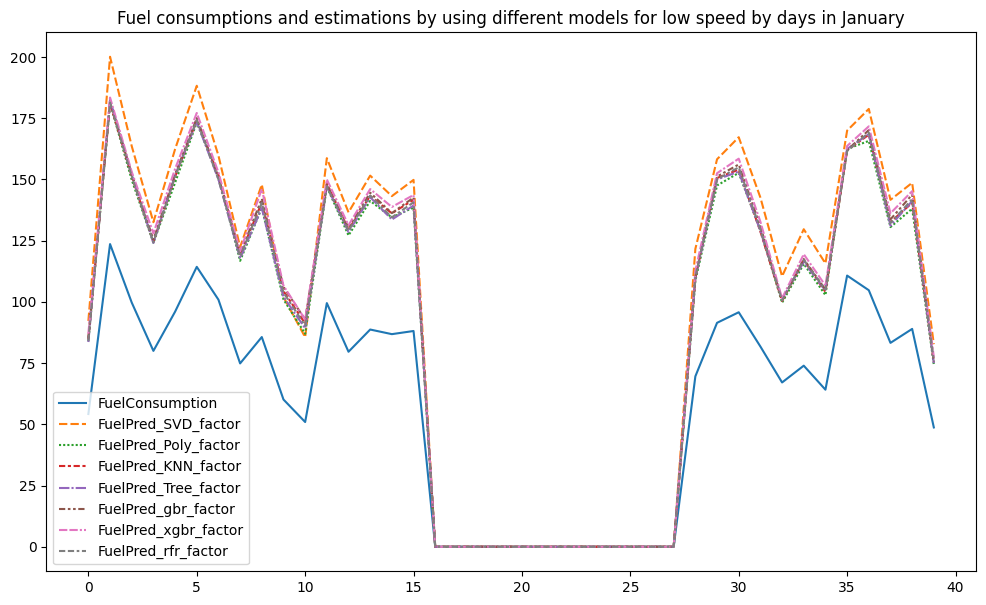

In [196]:
df_20200116_speed_1_days["FuelPred_SVD_factor"] = df_20200116_speed_1_days["FuelPred_SVD"]*factor_week_SVD
df_20200116_speed_1_days["FuelPred_Poly_factor"] = df_20200116_speed_1_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_1_days["FuelPred_KNN_factor"] = df_20200116_speed_1_days["FuelPred_knn"]*factor_week_knn
df_20200116_speed_1_days["FuelPred_Tree_factor"] = df_20200116_speed_1_days["FuelPred_tree"]*factor_week_tree
df_20200116_speed_1_days["FuelPred_gbr_factor"] = df_20200116_speed_1_days["FuelPred_gbr"]*factor_week_gbr
df_20200116_speed_1_days["FuelPred_xgbr_factor"] = df_20200116_speed_1_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200116_speed_1_days["FuelPred_rfr_factor"] = df_20200116_speed_1_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_1_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for low speed by days in January")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for middle speed by days in January')]

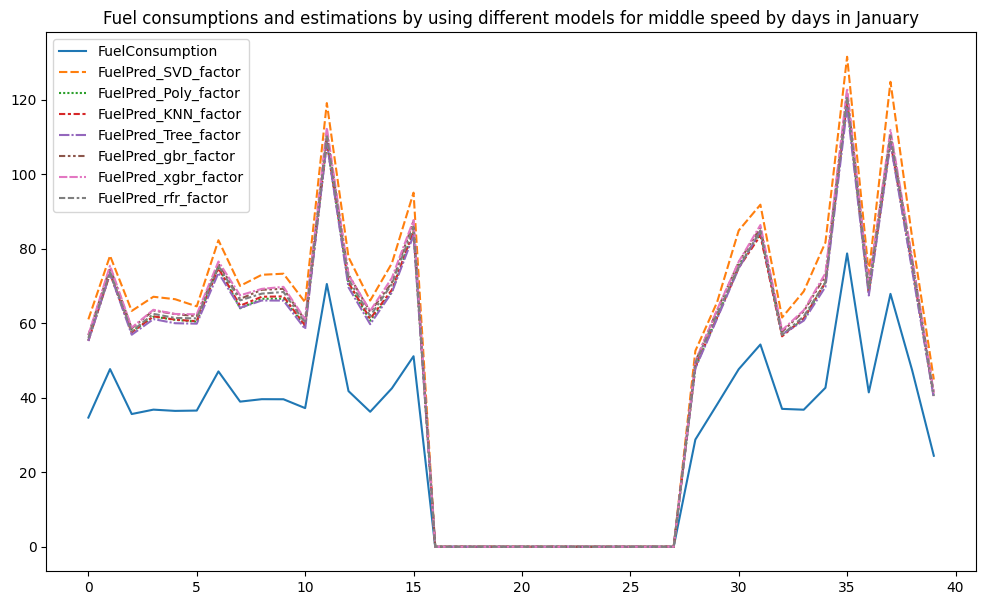

In [197]:
df_20200116_speed_2_days["FuelPred_SVD_factor"] = df_20200116_speed_2_days["FuelPred_SVD"]*factor_week_SVD
df_20200116_speed_2_days["FuelPred_Poly_factor"] = df_20200116_speed_2_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_2_days["FuelPred_KNN_factor"] = df_20200116_speed_2_days["FuelPred_knn"]*factor_week_knn
df_20200116_speed_2_days["FuelPred_Tree_factor"] = df_20200116_speed_2_days["FuelPred_tree"]*factor_week_tree
df_20200116_speed_2_days["FuelPred_gbr_factor"] = df_20200116_speed_2_days["FuelPred_gbr"]*factor_week_gbr
df_20200116_speed_2_days["FuelPred_xgbr_factor"] = df_20200116_speed_2_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200116_speed_2_days["FuelPred_rfr_factor"] = df_20200116_speed_2_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_2_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for middle speed by days in January")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for high speed by days in January')]

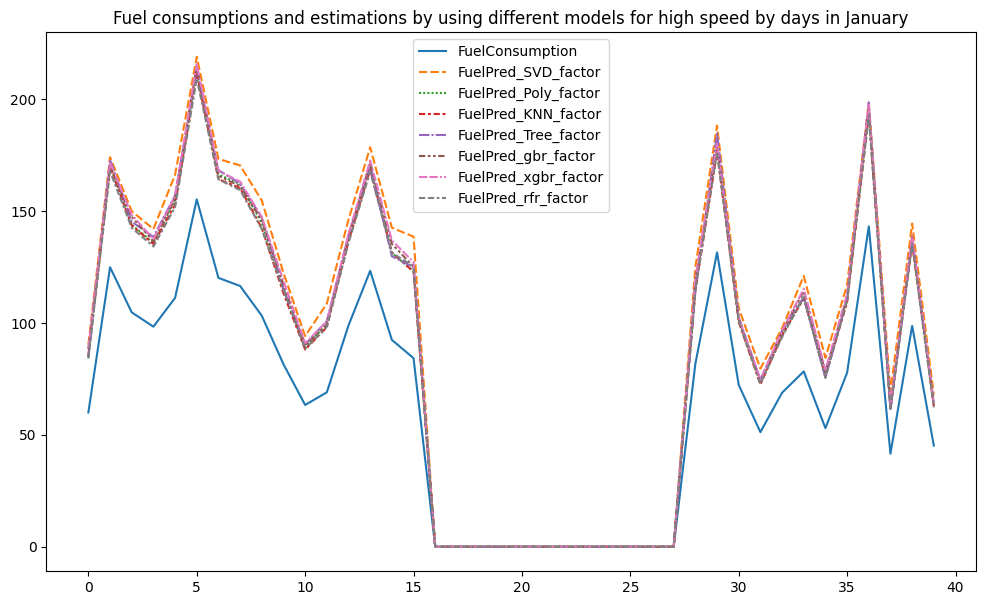

In [198]:
df_20200116_speed_3_days["FuelPred_SVD_factor"] = df_20200116_speed_3_days["FuelPred_SVD"]*factor_week_SVD
df_20200116_speed_3_days["FuelPred_Poly_factor"] = df_20200116_speed_3_days["FuelPred_Poly"]*factor_week_Poly
df_20200116_speed_3_days["FuelPred_KNN_factor"] = df_20200116_speed_3_days["FuelPred_knn"]*factor_week_knn
df_20200116_speed_3_days["FuelPred_Tree_factor"] = df_20200116_speed_3_days["FuelPred_tree"]*factor_week_tree
df_20200116_speed_3_days["FuelPred_gbr_factor"] = df_20200116_speed_3_days["FuelPred_gbr"]*factor_week_gbr
df_20200116_speed_3_days["FuelPred_xgbr_factor"] = df_20200116_speed_3_days["FuelPred_xgbr"]*factor_week_xgbr
df_20200116_speed_3_days["FuelPred_rfr_factor"] = df_20200116_speed_3_days["FuelPred_rfr"]*factor_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_20200116_speed_3_days[["FuelConsumption","FuelPred_SVD_factor", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for high speed by days in January")